<a href="https://colab.research.google.com/github/Mahim-SOL/ML_intern_task_2/blob/main/ML_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'apparel-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F622290%2F1110281%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240329%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240329T093335Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7f017951cb37a521c03954e96245cf11761f04b4ab2754a0a48251d7594ee06d40883714ab3fff786b849040ed3bc706f1e16e350a4940e8a6583f1c474c507cbbb1a74cddba8f73426218286ddd56fcf4183094cdf4a6f0201ff8898e5157381a87650af30944030a9ba635b67308191d1be91c440c638d811b07e829a5bdd5c645df4fee8e1501b9e0a9005c27bdf3eca86e90380cfb944a7f673feae23c5dbada42c35b68917d5d5088a3752a886da671a238ed138bfb32b3f44fdc3647b7ece20394312b5a97bc1fcc0c41cfa7b70c49d747653131eab950d778434eedf1fa627c204d8dfd2883d7d9a7664ef8b97aec6829f3ce6f7745140ebb072f98ef'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 168367086 bytes downloaded
Downloaded and uncompressed: apparel-dataset
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)
#data_dir = '/kaggle/input'
#parent_dir = os.path.basename(data_dir)
#print("Parent directory:", parent_dir)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
print(os.listdir("../input"))

['apparel-dataset']


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
dir_path = "../input/apparel-dataset/"

(256, 256, 3)


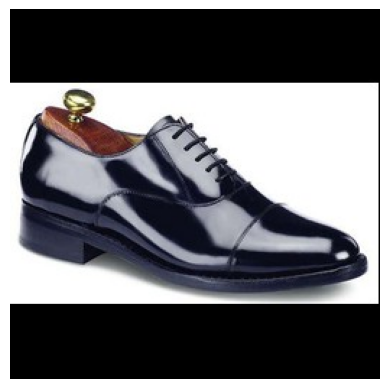

In [6]:
d = mpimg.imread("/kaggle/input/apparel-dataset/black_shoes/662.jpg")
print(d.shape)
plt.imshow(d)
plt.axis('off')
plt.show()

In [7]:
#import libraries
import os
import tensorflow as tf
import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

input_shape = (256, 256, 3)
num_classes = 37

#loading pre-trained model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

#freezing weights
for layer in vgg16_base.layers:
    layer.trainable = False

#Adding new classification layers
x = Flatten()(vgg16_base.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=vgg16_base.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

train_data_dir = dir_path
batch_size = 32

#image data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

#generating and preprocessing train and validation data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',

)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',

)
print("Number of training samples:", train_generator.samples)


58889256/58889256 [==============================] - 2s 0us/step
Found 12949 images belonging to 37 classes.
Found 3221 images belonging to 37 classes.
Number of training samples: 12949


In [8]:
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

score = model.evaluate(validation_generator)
print("Validation loss:", score[0])
print("Validation accuracy:", score[1])


Epoch 1/10
404/404 [==============================] - 320s 768ms/step - loss: 2.2221 - accuracy: 0.3786 - val_loss: 1.5634 - val_accuracy: 0.5309
Epoch 2/10
404/404 [==============================] - 280s 693ms/step - loss: 1.4067 - accuracy: 0.5839 - val_loss: 1.2758 - val_accuracy: 0.6203
Epoch 3/10
404/404 [==============================] - 303s 748ms/step - loss: 1.1485 - accuracy: 0.6560 - val_loss: 1.0280 - val_accuracy: 0.6953
Epoch 4/10
404/404 [==============================] - 298s 738ms/step - loss: 0.9994 - accuracy: 0.7005 - val_loss: 0.9760 - val_accuracy: 0.6978
Epoch 5/10
404/404 [==============================] - 307s 759ms/step - loss: 0.9186 - accuracy: 0.7141 - val_loss: 0.8781 - val_accuracy: 0.7219
Epoch 6/10
404/404 [==============================] - 303s 751ms/step - loss: 0.8481 - accuracy: 0.7384 - val_loss: 0.8653 - val_accuracy: 0.7341
Epoch 7/10
404/404 [==============================] - 304s 753ms/step - loss: 0.7852 - accuracy: 0.7533 - val_loss: 0.8578 -